In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import torch
import torch.optim as optim
import torchvision

In [139]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [140]:
def matrix_factorize(I,r,device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")):
    I = I.to(device)

    # Initialize the W and H matricies
    W = torch.randn(I.shape[0],r,device=device ,requires_grad=True)
    H = torch.randn(r,I.shape[1], device=device ,requires_grad=True)

    # Using gradient descent on W and H
    optimizer = optim.Adam([W, H], lr=0.01)
    mask = ~torch.isnan(I)

    threshold = 0.000001
    loss0 = np.inf
    loss1 = 0
    count = 0

    while abs(loss0 - loss1) > threshold:
        diff_matrix = torch.mm(W,H) - I
        diff_vec = diff_matrix[mask]
        loss = torch.norm(diff_vec)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss0,loss1 = loss1,loss
        if count % 500 == 0:
            print(count,"loss:",loss)
        count+=1

    # for i in range(1000):
    #     # Compute the loss
    #     diff_matrix = torch.mm(W, H) - I
    #     diff_vector = diff_matrix[mask]
    #     loss = torch.norm(diff_vector)
        
    #     # Zero the gradients
    #     optimizer.zero_grad()
        
    #     # Backpropagate
    #     loss.backward()
        
    #     # Update the parameters
    #     optimizer.step()

    #     if i % 100 == 0:
    #         print(i,"loss:",loss)
    
    
    return W,H,loss


In [141]:
def rmse(y,y_hat):
    rmse = np.sqrt(np.mean((y - y_hat) ** 2))
    return rmse

def psnr(y,y_hat):
    rmse_value = rmse(y,y_hat)
    if rmse==0:
        psnr == np.inf
    else:
        psnr = 20 * np.log10(250/rmse_value)
    return psnr

In [142]:
# Load image
img = torchvision.io.read_image("dog.jpg")
print(img.shape)

torch.Size([3, 1365, 2048])


In [143]:
#Normalize the image
img = (img - img.min()) / (img.max() - img.min())
print(img)

tensor([[[0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         [0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         [0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         ...,
         [0.4745, 0.4745, 0.4784,  ..., 0.3804, 0.3765, 0.3765],
         [0.4745, 0.4745, 0.4784,  ..., 0.3804, 0.3804, 0.3765],
         [0.4745, 0.4745, 0.4784,  ..., 0.3843, 0.3804, 0.3804]],

        [[0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         [0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         [0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         ...,
         [0.4039, 0.4039, 0.4078,  ..., 0.3216, 0.3176, 0.3176],
         [0.4039, 0.4039, 0.4078,  ..., 0.3216, 0.3216, 0.3176],
         [0.4039, 0.4039, 0.4078,  ..., 0.3255, 0.3216, 0.3216]],

        [[0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.1176],
         [0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.1176],
         [0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.

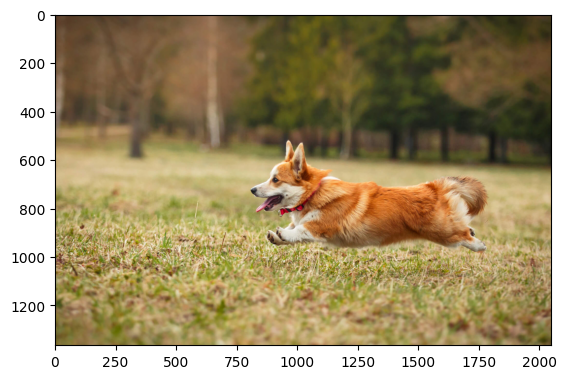

In [144]:
plt.imshow(img.permute(1,2,0))

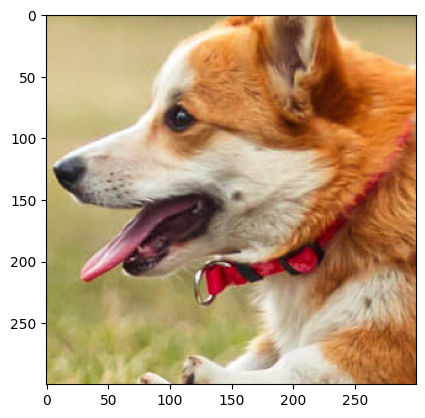

In [145]:
img = torchvision.transforms.functional.crop(img.cpu(), 600, 800, 300, 300)
plt.imshow(img.permute(1,2,0))

In [146]:
print(img.shape)

torch.Size([3, 300, 300])


In [147]:
#Convert image to gray scale
img_gray=img.mean(dim=0,keepdim=False,dtype=torch.float)
print(img_gray.shape)

torch.Size([300, 300])


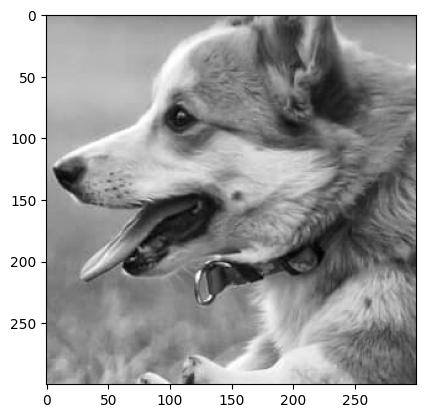

In [148]:
plt.imshow(img_gray, cmap='gray')

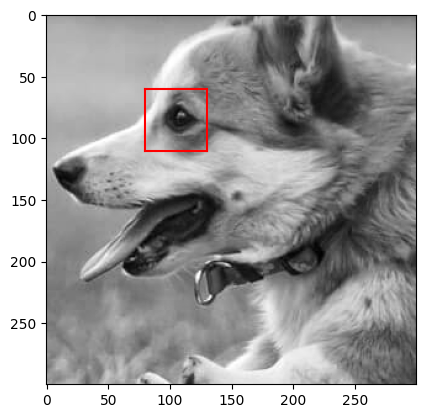

In [149]:
#Choosing a 50x50 patch
plt.imshow(img_gray, cmap='gray')
plt.plot([80,80],[60,110], color='r')
plt.plot([130,130],[60,110], color='r')
plt.plot([80,130],[60,60], color='r')
plt.plot([80,130],[110,110], color='r')
plt.show()

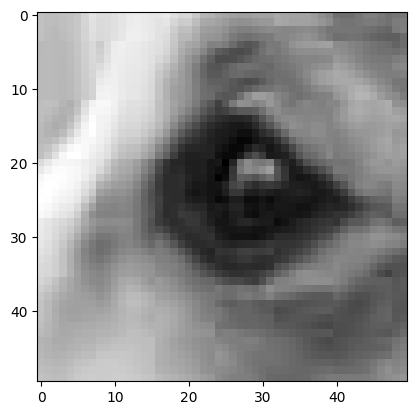

In [150]:
#Showing patch
patch = img_gray[60:110,80:130]
plt.imshow( patch, cmap='gray')

MATRIX FACTORIZATION

In [157]:
rmse_array = []
pnsr_array = []

0 loss: tensor(114.4931, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(2.9924, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(2.1182, grad_fn=<LinalgVectorNormBackward0>)
1500 loss: tensor(1.7720, grad_fn=<LinalgVectorNormBackward0>)
2000 loss: tensor(1.6134, grad_fn=<LinalgVectorNormBackward0>)
Fianl loss: tensor(1.5720, grad_fn=<LinalgVectorNormBackward0>)
max pixel value before clipping: 0.989193 and min pixel value before clipping: 0.051542725


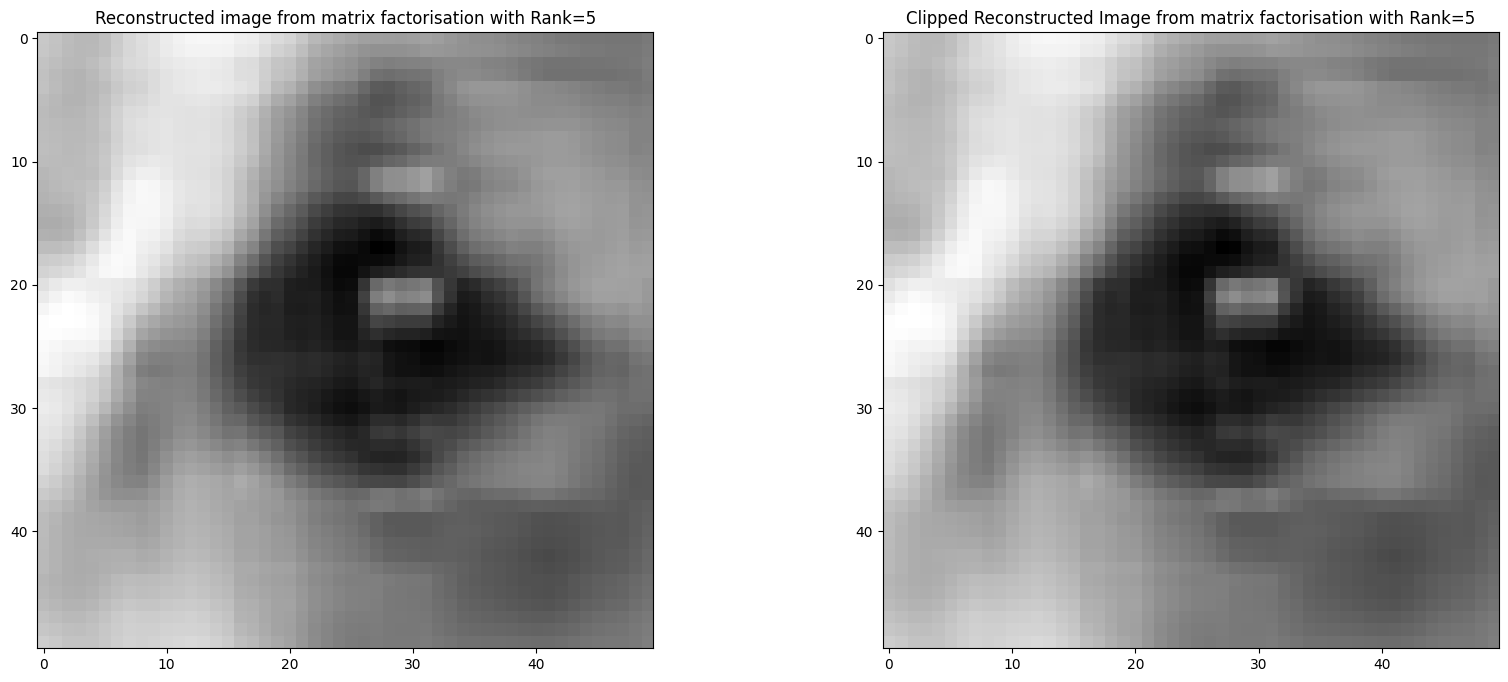

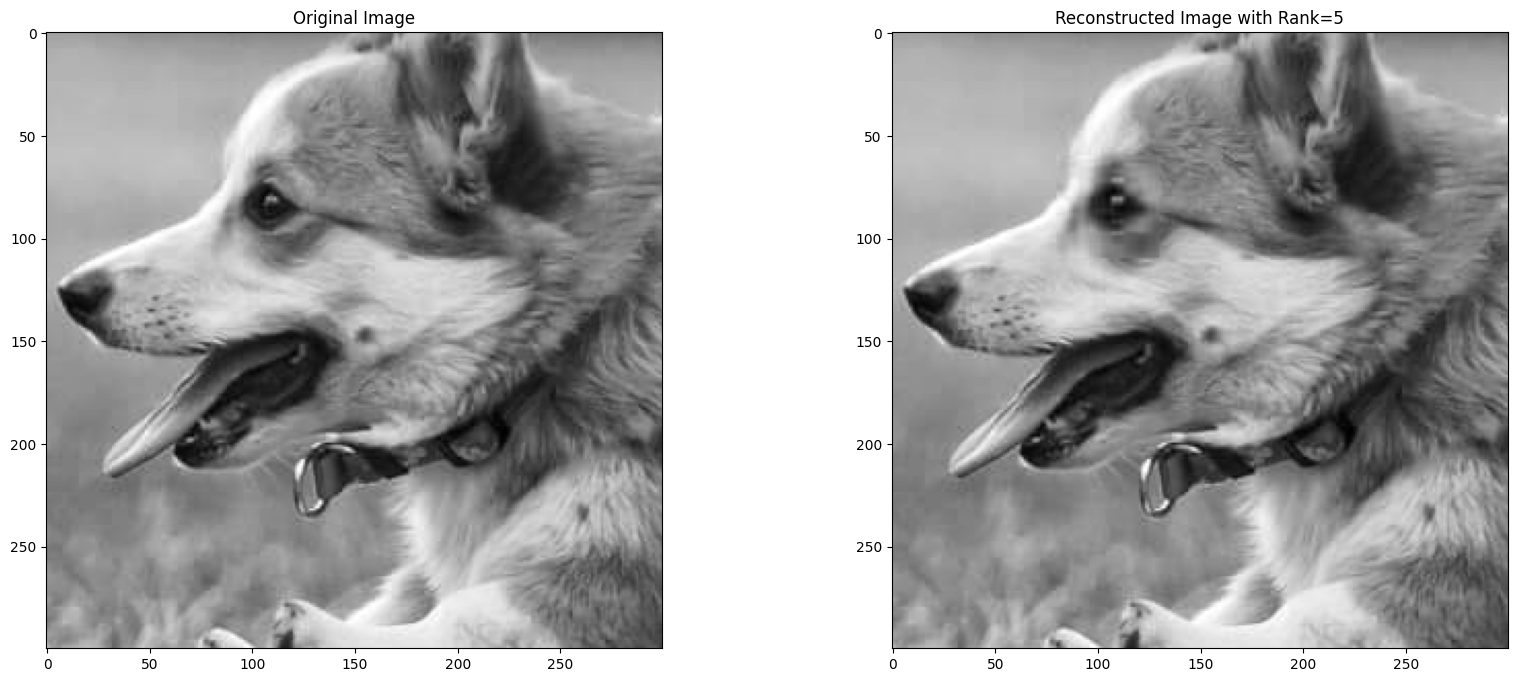

RMSE for original image patch and reconstructed image patch(Clipped): 0.03144002
PSNR for original image patch and reconstructed image patch(Clipped): 78.00914400914328

0 loss: tensor(131.5188, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(2.5063, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(2.0678, grad_fn=<LinalgVectorNormBackward0>)
1500 loss: tensor(1.7287, grad_fn=<LinalgVectorNormBackward0>)
2000 loss: tensor(1.5972, grad_fn=<LinalgVectorNormBackward0>)
2500 loss: tensor(1.5674, grad_fn=<LinalgVectorNormBackward0>)
Fianl loss: tensor(1.5669, grad_fn=<LinalgVectorNormBackward0>)
max pixel value before clipping: 0.98910093 and min pixel value before clipping: 0.05144704


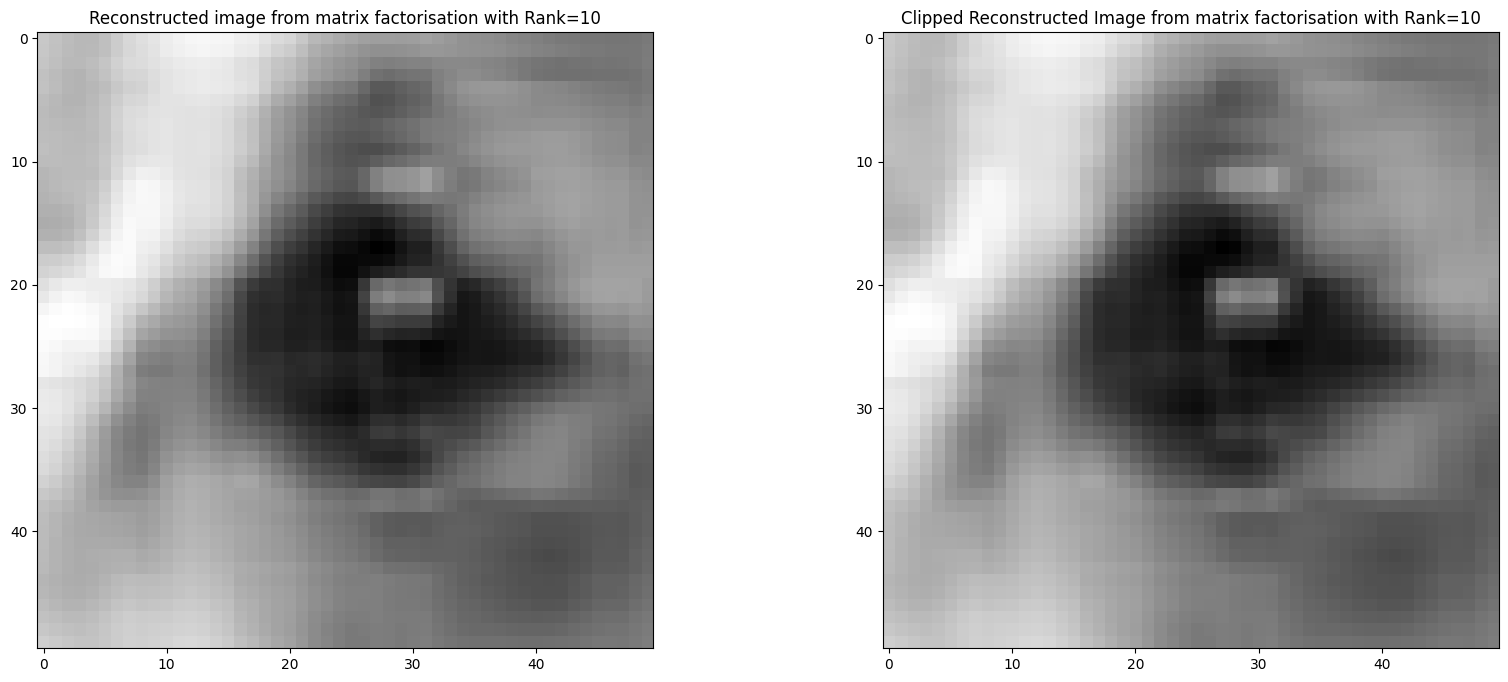

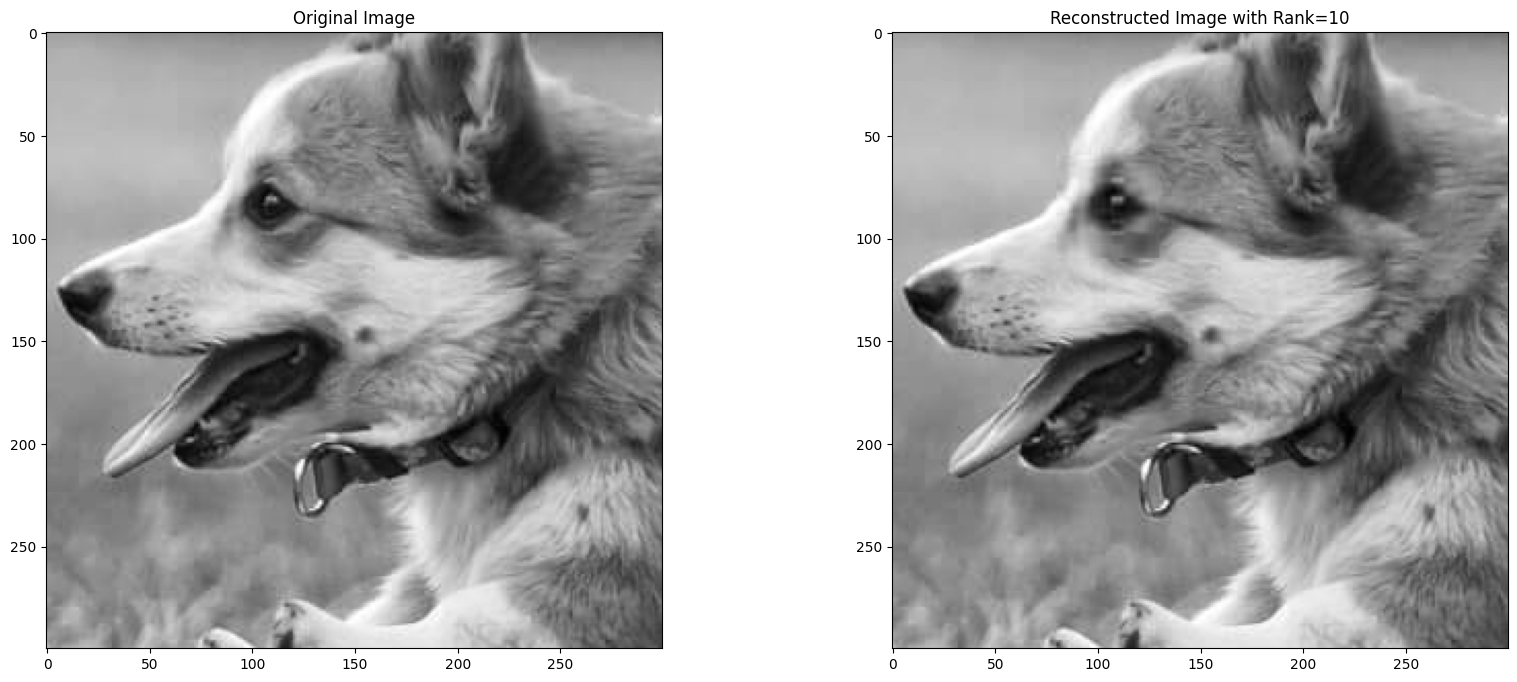

RMSE for original image patch and reconstructed image patch(Clipped): 0.03133738
PSNR for original image patch and reconstructed image patch(Clipped): 78.03754638143461

0 loss: tensor(109.4982, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(2.3137, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(1.6878, grad_fn=<LinalgVectorNormBackward0>)
Fianl loss: tensor(1.5942, grad_fn=<LinalgVectorNormBackward0>)
max pixel value before clipping: 0.99077547 and min pixel value before clipping: 0.055197876


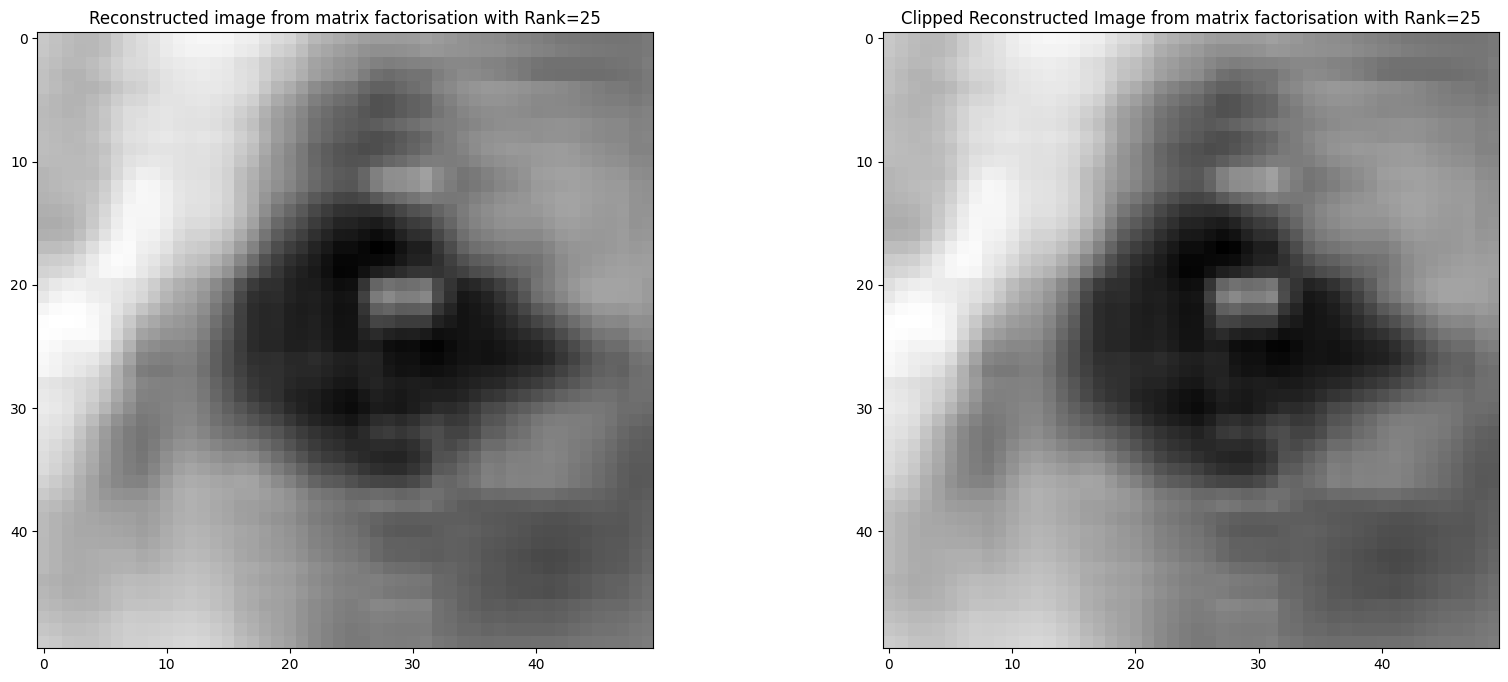

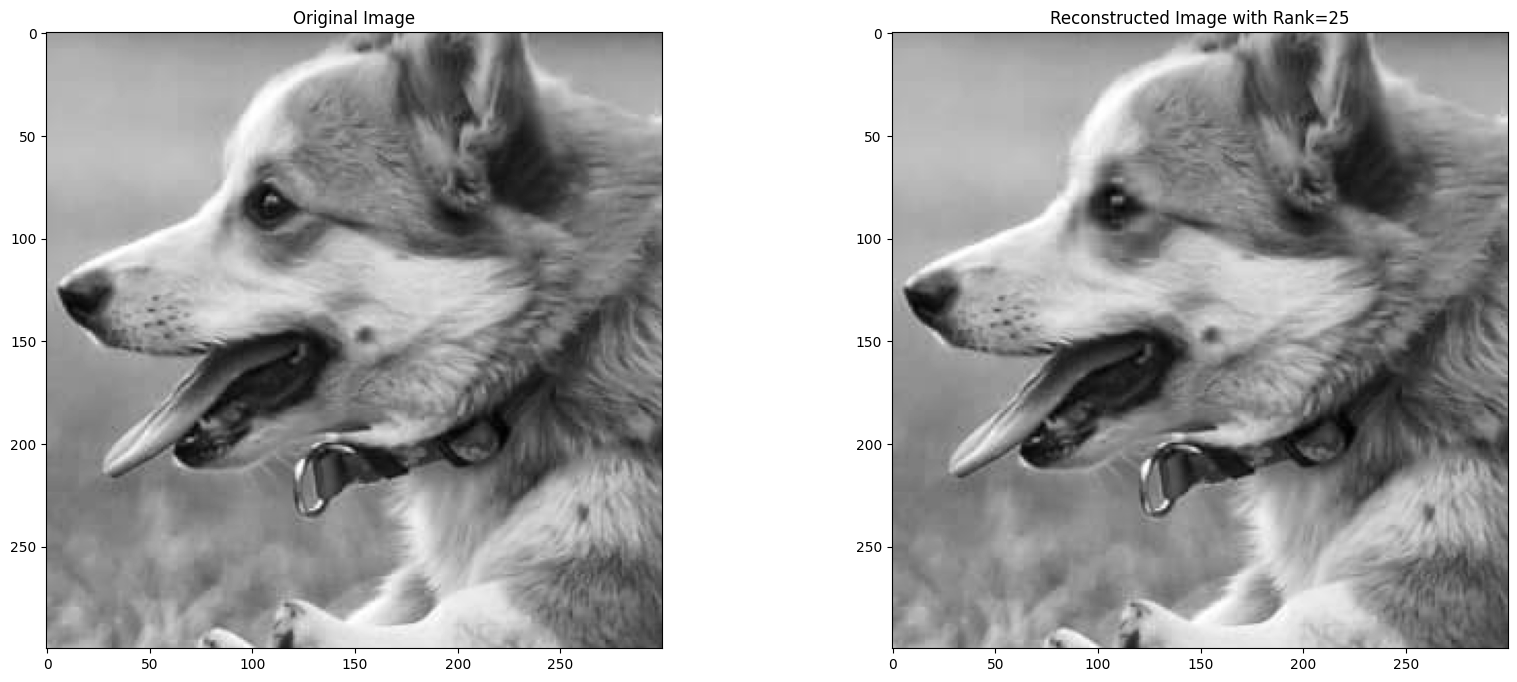

RMSE for original image patch and reconstructed image patch(Clipped): 0.03188187
PSNR for original image patch and reconstructed image patch(Clipped): 77.88792475786038

0 loss: tensor(124.5479, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(2.6499, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(2.4055, grad_fn=<LinalgVectorNormBackward0>)
1500 loss: tensor(1.9877, grad_fn=<LinalgVectorNormBackward0>)
Fianl loss: tensor(1.8884, grad_fn=<LinalgVectorNormBackward0>)
max pixel value before clipping: 0.9799862 and min pixel value before clipping: 0.07244783


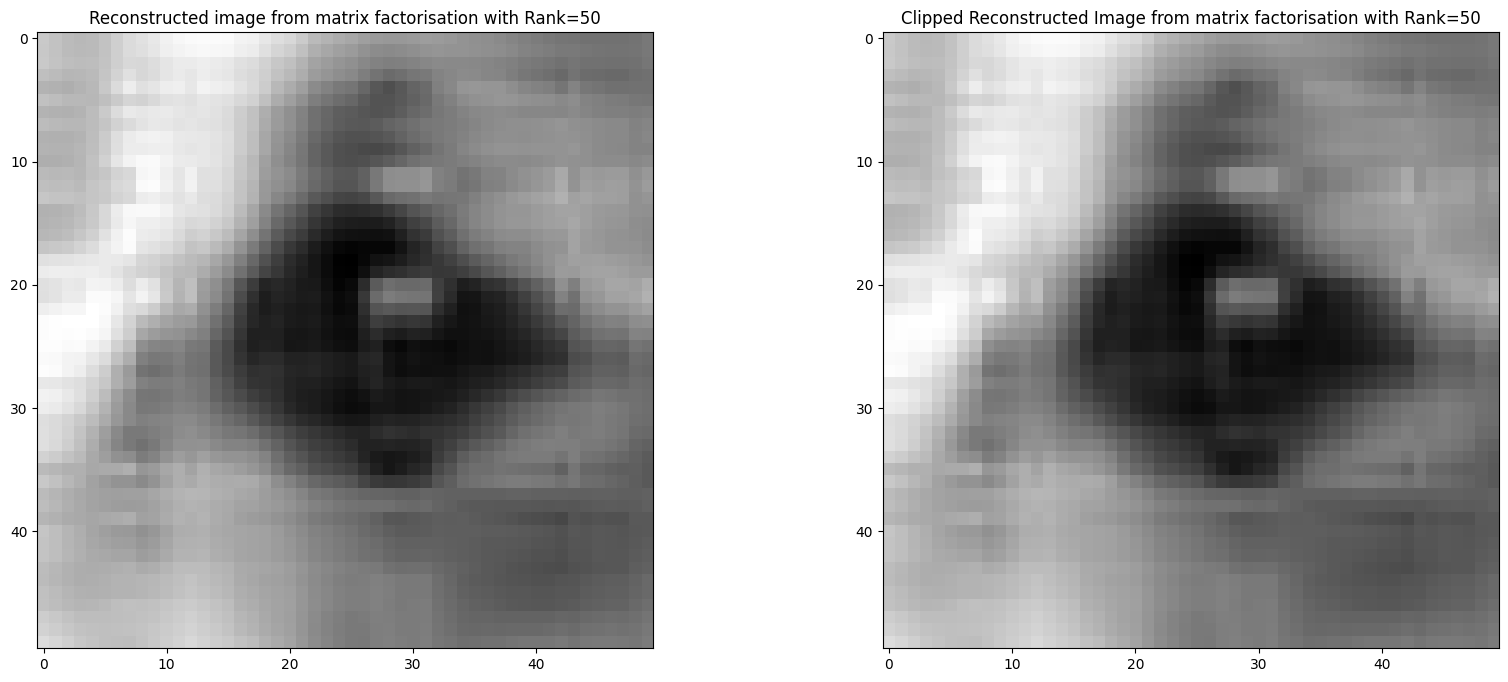

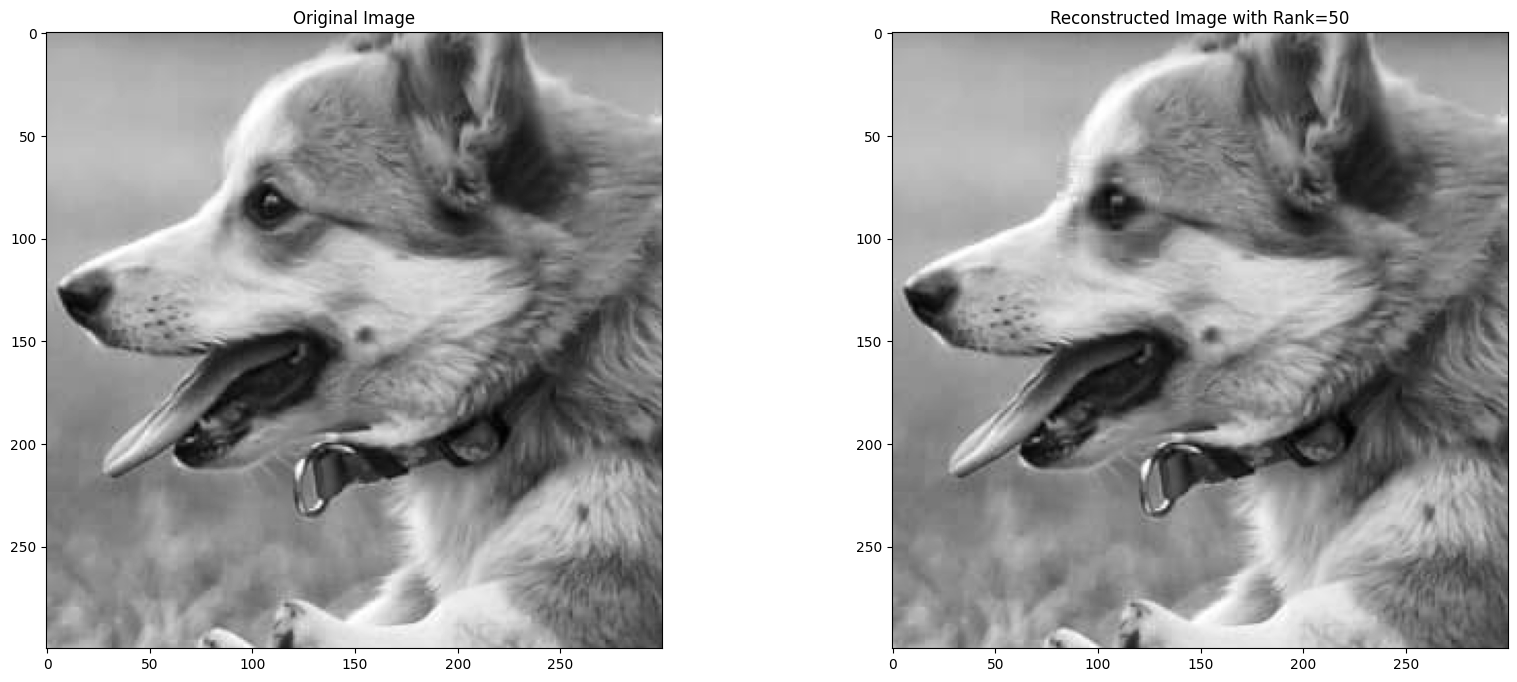

RMSE for original image patch and reconstructed image patch(Clipped): 0.03771864
PSNR for original image patch and reconstructed image patch(Clipped): 76.42767995024018



In [158]:
for r in [ 5 , 10 , 25 , 50]:
    # Image reconstruction using matrix factorization
    W, H, loss = matrix_factorize(patch, 5)
    print("Fianl loss:",loss)

    #Showing the original and reconstructed patches
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    patch_reconstructed = torch.mm(W, H).cpu().detach().numpy()
    plt.title(f"Reconstructed image from matrix factorisation with Rank={r}")
    plt.imshow(patch_reconstructed, cmap='gray')

    print("max pixel value before clipping:",patch_reconstructed.max(),"and min pixel value before clipping:",patch_reconstructed.min())

    #Clipped Image
    plt.subplot(1,2,2)
    patch_reconstructed_clipped = np.clip(patch_reconstructed, 0, 255)
    plt.title(f"Clipped Reconstructed Image from matrix factorisation with Rank={r}")
    plt.imshow(patch_reconstructed_clipped, cmap='gray')

    plt.show()

    #Comparing original image to reconstructed image
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Original Image")

    img_reconstructed = img_gray.clone()
    img_reconstructed = img_reconstructed.cpu().detach().numpy()
    img_reconstructed[60:110,80:130] = patch_reconstructed_clipped

    plt.subplot(1,2,2)
    plt.imshow(img_reconstructed, cmap='gray')
    plt.title(f"Reconstructed Image with Rank={r}")

    plt.show()

    #Printing the RMSE and PNSR values for original and reconstructed patches
    patch = patch.cpu().detach().numpy()
    print("RMSE for original image patch and reconstructed image patch(Clipped):",rmse(patch,patch_reconstructed_clipped))
    rmse_array.append(rmse(patch,patch_reconstructed_clipped))
    print("PSNR for original image patch and reconstructed image patch(Clipped):",psnr(patch,patch_reconstructed_clipped))
    pnsr_array.append(psnr(patch,patch_reconstructed_clipped))
    print()
    patch = torch.from_numpy(patch)

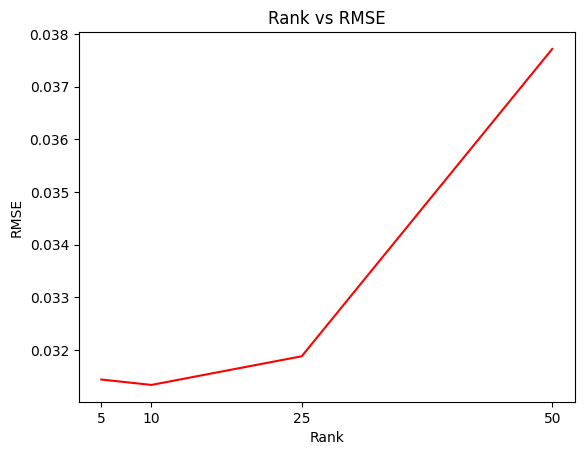

In [159]:
# Plotting rank vs RMSE
plt.title("Rank vs RMSE")
plt.xlabel("Rank")
plt.xticks([5 , 10 , 25 , 50])
plt.ylabel("RMSE")
plt.plot([5 , 10 , 25 , 50], rmse_array , color='r')
plt.show()

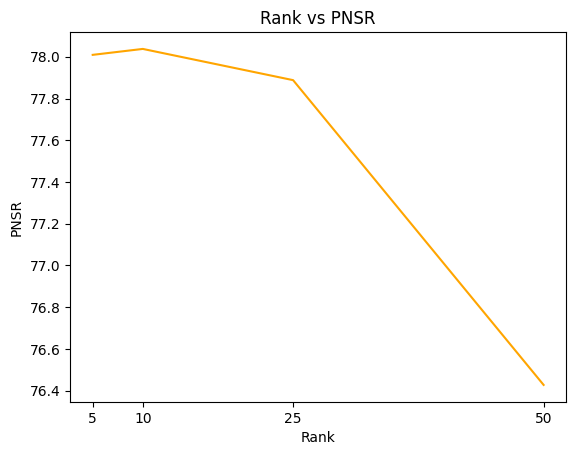

In [160]:
# Plotting rank vs PNSR
plt.title("Rank vs PNSR")
plt.xlabel("Rank")
plt.xticks([5 , 10 , 25 , 50])
plt.ylabel("PNSR")
plt.plot([5 , 10 , 25 , 50], pnsr_array , color='orange')
plt.show()